In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2


# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
import datetime
import pickle


# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
from multiprocessing import cpu_count
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
# import ffn


# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')
#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

RANDOM_STATE = 777

print()

Last updated: 2024-09-03T10:48:20.214019-04:00

Python implementation: CPython
Python version       : 3.8.19
IPython version      : 8.12.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit




/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_17231/2173331131.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [2]:
import os

# Run the setup script
%run ../../config/setup_project.py

# Call the function to set up the project path
setup_project_path()

# Now you can import your modules
from src.utils import helper as h_
import src.ch_02.code_ch_02 as f_ch2
import src.ch_03.code_ch_03 as f_ch3
import src.ch_04.code_ch_04 as f_ch4
import code_ch_05 as f_ch5

Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financial_math/lib/python38.zip', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/lib-dynload', '', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages/setuptools/_vendor', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config']
Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financ

In [3]:
"""
### 5.1 Generate a time series from an IID Gaussian random process. This is a memory-less, stationary series:

- **(a)** Compute the ADF statistic on this series. What is the p-value?

- **(b)** Compute the cumulative sum of the observations. This is a non-stationary series without memory.
  - (i) What is the order of integration of this cumulative series?
  - (ii) Compute the ADF statistic on this series. What is the p-value?

- **(c)** Differentiate the series twice. What is the p-value of this over-differentiated series?

"""

'\n### 5.1 Generate a time series from an IID Gaussian random process. This is a memory-less, stationary series:\n\n- **(a)** Compute the ADF statistic on this series. What is the p-value?\n\n- **(b)** Compute the cumulative sum of the observations. This is a non-stationary series without memory.\n  - (i) What is the order of integration of this cumulative series?\n  - (ii) Compute the ADF statistic on this series. What is the p-value?\n\n- **(c)** Differentiate the series twice. What is the p-value of this over-differentiated series?\n\n'

## 5.1 Generate a time series from an IID Gaussian random process. This is a memory-less, stationary series:

ADF Statistic: -15.3722
p-value: 0.0000
Critical Values:
	1%: -3.4310
	5%: -2.8618
	10%: -2.5669


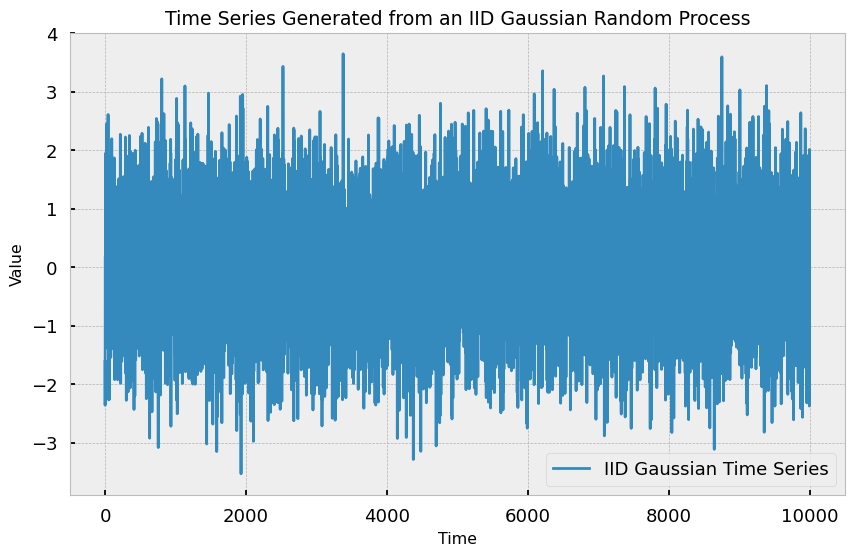

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Set parameters
n = 10_000  # Length of the time series
mu = 0    # Mean of the Gaussian distribution
sigma = 1 # Standard deviation of the Gaussian distribution

# Generate the IID Gaussian time series
time_series = np.random.normal(mu, sigma, n)

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(time_series, autolag=None)

# Extract and print the test results
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))
print("Critical Values:")

for key, value in adf_result[4].items():
    print("\t{}: {:.4f}".format(key, value))

# Plot the generated time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='IID Gaussian Time Series')
plt.title('Time Series Generated from an IID Gaussian Random Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### **(a)** Compute the ADF statistic on this series. What is the p-value?

In [ ]:
# Compute the ADF test on the original time series
adf_result = adfuller(time_series, maxlag=1, autolag=None)

# Extracting the ADF statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

adf_statistic, p_value

### - **(b)** Compute the cumulative sum of the observations. This is a non-stationary series without memory.
####  - (i) What is the order of integration of this cumulative series?
####  - (ii) Compute the ADF statistic on this series. What is the p-value?

In [ ]:
# **(b)** Compute the cumulative sum of the observations. This is a non-stationary series without memory.
cumulative_series = np.cumsum(time_series)

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(cumulative_series, maxlag=1, autolag=None)

# Extract and print the test results
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))
print("Critical Values:")

for key, value in adf_result[4].items():
    print("\t{}: {:.4f}".format(key, value))

# Plot the generated time series
plt.figure(figsize=(10, 6))
plt.plot(cumulative_series, label='IID Gaussian Time Series')
plt.title('Time Series Generated from an IID Gaussian Random Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

#### (i) What is the order of integration of this cumulative series?

In [ ]:
diff1_cusum = np.diff(cumulative_series)
diff1_cusum

In [ ]:
# Function to determine the order of integration
def find_order_of_integration(series, **kwargs):
    order = 0
    current_series = series
    while True:
        adf_result = adfuller(current_series, **kwargs)
        p_value = adf_result[1]
        if p_value < 0.05:  # Series is stationary
            break
        else:
            current_series = np.diff(current_series)  # Difference the series
            order += 1
    return order


In [ ]:
# Determine the order of integration for the cumulative series
order_of_integration = find_order_of_integration(
    cumulative_series, maxlag=1, autolag=None
)
print(f"Order of Integration: I({order_of_integration})")

#### (ii) Compute the ADF statistic on this series. What is the p-value?

In [ ]:
# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(cumulative_series, maxlag=1, autolag=None)

# Extract and print the test results
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))

## **(c)** Differentiate the series twice. What is the p-value of this over-differentiated series?

In [ ]:
# ## **(c)** Differentiate the series twice. What is the p-value of this over-differentiated series?
diff_2 = np.diff(cumulative_series, n=2)

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(diff_2, maxlag=1, autolag=None)

# Extract and print the test results
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))

In [ ]:
"""
### 5.2 Generate a time series that follows a sinusoidal function. This is a stationary series with memory.

- **(a)** Compute the ADF statistic on this series. What is the p-value?

- **(b)** Shift every observation by the same positive value. Compute the cumulative sum of the observations. This is a non-stationary series with memory.
  - (i) Compute the ADF statistic on this series. What is the p-value?
  - (ii) Apply an expanding window fracdiff, with $\tau = 1E-2 \). For what minimum \( d \) value do you get a p-value below 5%?
  - (iii) Apply FFD, with \( \tau = 1E-5 \). For what minimum $d \) value do you get a p-value below 5%?
"""

## 5.2 Generate a time series that follows a sinusoidal function. This is a stationary series with memory.

In [ ]:
np.random.seed(0)

nsample = 10_000
x = range(1, nsample + 1)
## simulate a simple sinusoidal function
ns = np.linspace(0, 10, nsample)
y = pd.Series(1*np.sin(2.0 * ns + .5), dtype = float, index=x)
print("p-value: {:.4f}".format(adfuller(y, maxlag=1, autolag=None)[1]))

In [ ]:
# Plot the sinusoidal time series
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Sinusoidal Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sinusoidal Time Series')
plt.legend()
plt.show()


#### **(a)** Compute the ADF statistic on this series. What is the p-value?

In [ ]:
# Compute the ADF test on the original time series
adf_result = adfuller(y, maxlag=1, autolag=None)

# Extracting the ADF statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

adf_statistic, p_value

### **(b)** Shift every observation by the same positive value. Compute the cumulative sum of the observations. This is a non-stationary series with memory.

In [ ]:
# Shift every observation by the same positive value
SHIFT_VALUE = 1
shift_y = y + SHIFT_VALUE

# Compute the cumulative sum of the shifted observations
cumul_y = np.cumsum(shift_y)

# Plot the original, shifted, and cumulative series
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Original Sinusoidal Series')
plt.plot(x, shift_y, label='Shifted Series')
plt.plot(x, cumul_y, label='Cumulative Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sinusoidal, Shifted, and Cumulative Series')
plt.legend()
plt.show()

#### (i) Compute the ADF statistic on this series. What is the p-value?

In [ ]:
# Compute the ADF test on the original time series
adf_result = adfuller(cumul_y, maxlag=1, autolag=None)

# Extracting the ADF statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

adf_statistic, p_value

#### (ii) Apply an expanding window fracdiff, with $\tau = 1E-2$. For what minimum $d$ value do you get a p-value below 5%?

In [ ]:
def get_min_diff(data:pd.Series, diff_method, threshold: float, pval = 0.05, 
                 dateIndex = False, **kwargs):
    d_domain = np.linspace(start = 0, 
                           stop = 2, 
                           num=21, 
                           endpoint=True, 
                           retstep=False, 
                           dtype=float)
    data = pd.DataFrame(data, columns=['close'])
    if dateIndex:
        data = data.resample('1D').last()  # Downcast to daily observations
    logdata = np.log(data[['close']])
    logdata.dropna(inplace=True)
    
    for d in d_domain:
        df = diff_method(data, d, threshold) # SIMULATED DATA, USE PRICE, NOT LOG PRICE
        # results = adfuller(df.squeeze(), maxlag=1, regression='c', autolag=None)
        results = adfuller(df.squeeze(), **kwargs)
        print('='*27)
        print(f'Order of Integration: {d}')
        print('-'*27)
        p_value = results[1]
        print(f'p-value: {p_value:.4f}')
        if p_value < pval:
            print(f"Minimum d value: {d:.2f}")
            return d
    print("No d value found")
    return None

d_order = get_min_diff(cumul_y, f_ch5.fracDiff, threshold=1e-2, maxlag=1, autolag=None)

In [ ]:
def plot_y_and_diff(data:pd.Series, diff_method, d:float, threshold: float):
    data = pd.DataFrame(data, columns=['close'])
    # data['close'] = np.log(data['close'])
    # print(data)
    
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the original close series on the primary y-axis
    ax1.plot(data.index, data['close'], label='Original Close', color='blue')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Original Close Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    
    diff_data = diff_method(data,d=d, thres=threshold)
    # diff_data = data.diff(d).dropna()
    # print(diff_data)

    # Plot the fractionally differenced close series on the secondary y-axis
    ax2.plot(diff_data.index, diff_data['close'], label=f'Fractionally Differenced Close : d = {d:.2f}', color='red')
    ax2.set_ylabel(f'Fractionally Differenced Price', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Add titles and labels
    plt.title('Original Close vs. Fractionally Differenced Close')
    fig.tight_layout()  # Adjust the layout

    # Show the plot
    plt.show()


In [ ]:

plot_y_and_diff(cumul_y, f_ch5.fracDiff, d=d_order, threshold=1e-2)

### (iii) Apply FFD, with $\tau = 1E-5$. For what minimum $d$ value do you get a p-value below 5%?

In [ ]:
d_order = get_min_diff(cumul_y, f_ch5.fracDiff_FFD, threshold=1e-5, maxlag=1, autolag=None)
plot_y_and_diff(cumul_y, f_ch5.fracDiff_FFD, d=d_order, threshold=1e-5)

In [ ]:
f_ch5.plotMinFFD(df=cumul_y, threshold=1e-5, maxlag=1, autolag=None)

In [ ]:
"""
### 5.3 Take the series from exercise 2.b:

- **(a)** Fit the series to a sine function. What is the R-squared?
- **(b)** Apply FFD(\(d = 1\)). Fit the series to a sine function. What is the R-squared?
- **(c)** What value of \(d\) maximizes the R-squared of a sinusoidal fit on FFD(\(d\))? Why?

"""

## 5.3 Take the series from exercise 2.b:

In [ ]:
ts = cumul_y

#### **(a)** Fit the series to a sine function. What is the R-squared?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from bayes_opt import BayesianOptimization
from scipy.optimize import differential_evolution

series_ToFit = ts


def fit_sinusoide(series_ToFit, plot = True):
    # Define the sine function model
    def sine_function(x, a, b, c, d, e, f, g):
        return (
            a * np.sin(b * x + c)
            + d * np.cos(e * x + f)
            + g
        )

    # Generate x values (we'll use the index of the time series)
    x = np.arange(len(series_ToFit))

    # Objective function to minimize (negative R-squared)
    def objective(params):
        fitted_ts = sine_function(x, *params)
        r_squared = r2_score(series_ToFit, fitted_ts)
        return -r_squared  # Minimizing negative R-squared

    # Define parameter bounds
    bounds = [
        (-10, 10),  # a
        (-10, 10),  # b
        (-2 * np.pi, 2 * np.pi),  # c
        (-10, 10),  # d
        (-10, 10),  # e
        (-2 * np.pi, 2 * np.pi),  # f
        (np.min(series_ToFit), np.max(series_ToFit)),  # g
    ]

    # Perform differential evolution
    result = differential_evolution(objective, bounds)

    # Extract the best parameters
    best_params = result.x
    print(f"Best parameters: {best_params}")

    # Fit the sine function using the best parameters
    fitted_ts = sine_function(x, *best_params)

    # Calculate the R-squared value for the best fit
    r_squared = r2_score(series_ToFit, fitted_ts)

    # Plot the original time series and the fitted sine function
    if plot:
        print(f"Best R-squared: {r_squared}")
        plt.figure(figsize=(10, 6))
        plt.plot(x, series_ToFit, label="Original Time Series")
        plt.plot(x, fitted_ts, label="Fitted Sine Function", linestyle="--")
        plt.title("Fitting a Sine Function to the Time Series")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend()
        plt.show()
        
    return r_squared



In [ ]:
fit_sinusoide(series_ToFit)

#### **(b)** Apply FFD $(d = 1$). Fit the series to a sine function. What is the R-squared?

In [ ]:
diff_ts = f_ch5.fracDiff(pd.DataFrame(ts), d=1, thres=1e-5).squeeze()
series_ToFit = diff_ts
fit_sinusoide(series_ToFit)

### **(c)** What value of $d$ maximizes the R-squared of a sinusoidal fit on FFD($d$)? Why?

In [ ]:
ts

In [ ]:
d_domain = np.linspace(start = 0, 
                        stop = 2, 
                        num=51, 
                        endpoint=True, 
                        retstep=False, 
                        dtype=float)

rsquares = pd.Series(index=d_domain)
rmax = -np.inf
d_max = None

for d in d_domain:
    diff_ts = f_ch5.fracDiff(pd.DataFrame(ts), d=d, thres=1e-5).squeeze()
    rsq = fit_sinusoide(diff_ts, plot = False)
    print(f"Order of Integration: {d}")
    print(f"R-squared: {rsq:.4f}")
    print()
    rsquares.loc[d] = rsq
    if rsq > rmax:
        rmax = rsq
        d_max = d
    
rsquares

In [ ]:
rsquares.plot()

### 5.4 Take the dollar bar series on E-mini S&P 500 futures. Using the code in Snippet 5.3, for some $d \in [0, 2]$, compute `fracDiff_FFD(fracDiff_FFD(series, d), -d)`. What do you get? Why?


In [ ]:
# load ../data/variables_ch2.pkl
%run ../ch_02/code_ch_02.py

path = '../../data/variables_ch2.pkl'
import pickle
with open(path, 'rb') as f:
    bars = pickle.load(f)
    bar_time = pickle.load(f)
    
# df as bars['Dollar'].df_OLHC without 'cusum' column
df = bars['Dollar'].df_OLHC.drop(columns=['cusum'])
# For the purpose of this example, remove rows where time_close is duplicated
# (keep the first row)
# Remove rows where time_close is duplicated, keeping the first occurrence
df = df.drop_duplicates(subset='time_close', keep='first')
df


In [ ]:
# set index as 'time_close'
df = df.set_index('time_close')
close = df[['close']]
close

In [ ]:
D = 0.4
THRESH = 1e-5
SERIES = close

ts_tmp = f_ch5.fracDiff_FFD(series=SERIES, d=D, thres=THRESH)
ts_tmp = f_ch5.fracDiff_FFD(series=ts_tmp, d=-D, thres=THRESH)
ts_tmp.plot()

In [ ]:
"""### 5.5 Take the dollar bar series on E-mini S&P 500 futures.

- **(a)** Form a new series as a cumulative sum of log-prices.
- **(b)** Apply FFD, with \( \tau = 1E-5 \). Determine for what minimum \( d \in [0, 2] \) the new series is stationary.
- **(c)** Compute the correlation of the fracdiff series to the original (untransformed) series.
- **(d)** Apply an Engel-Granger cointegration test on the original and fracdiff series. Are they cointegrated? Why?
- **(e)** Apply a Jarque-Bera normality test on the fracdiff series.
"""

## 5.5 Take the dollar bar series on E-mini S&P 500 futures.

In [ ]:
close.plot()

#### **(a)** Form a new series as a cumulative sum of log-prices.

In [ ]:
logprice = np.log(close)
cumul_logprice = np.cumsum(logprice)
cumul_logprice.plot()

In [ ]:
logprice.plot()

### **(b)** Apply FFD, with $\tau = 1E-5$. Determine for what minimum $d \in [0, 2]$ the new series is stationary.

In [ ]:
SERIES = cumul_logprice
SERIES

In [ ]:
out, d_order = f_ch5.plotMinFFD(
    df=SERIES, threshold=1e-5, applyLog=False, maxlag=1, autolag=None
)

In [ ]:
d_order

In [ ]:
# d_order = get_min_diff(cumul_logprice, f_ch5.fracDiff_FFD, threshold=1e-5, dateIndex=True)
plot_y_and_diff(logprice, f_ch5.fracDiff_FFD, d=d_order, threshold=1e-5)

In [ ]:
# d_order = get_min_diff(cumul_logprice, f_ch5.fracDiff_FFD, threshold=1e-5, dateIndex=True)
plot_y_and_diff(SERIES, f_ch5.fracDiff_FFD, d=d_order, threshold=1e-5)

In [ ]:
SERIES = logprice

### **(c)** Compute the correlation of the fracdiff series to the original (untransformed) series.

In [ ]:
series_diff= f_ch5.fracDiff_FFD(SERIES, d=d_order, thres=1e-5)
series_diff.plot()

In [ ]:
# Compute the correlation between the fractionally differenced series and the original cumulative log-price series
correlation = series_diff.corrwith(SERIES)
correlation

In [ ]:
series_diff

In [ ]:
SERIES

### **(d)** Apply an Engel-Granger cointegration test on the original and fracdiff series. Are they cointegrated? Why?

In [ ]:
# inner join cumul_logprice, logcumul_diff. Add suffixes '_orig' and '_diff'
df_ = pd.DataFrame()
df_['log_price'] = logprice
df_['log_cumul'] = cumul_logprice
df_['close'] = close
df_['series_diff'] = series_diff
df_['SERIES'] = SERIES
df_.dropna(inplace=True)
df_.corr()

In [ ]:
df_

In [ ]:
from statsmodels.tsa.stattools import coint

# Apply the Engle-Granger cointegration test
# col_1 = df_['log_cumul']
col_1 = df_['series_diff']
col_2 = df_['SERIES']

# Plot col_1 and col_2
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the col_1 on primary y-axis
ax1.plot(col_1, label='Series 1', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Series 1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the col_2 on secondary y-axis
ax2.plot(col_2, label='Series 2', color='red')
ax2.set_ylabel('Series 2', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and labels
plt.title('Engle-Granger Cointegration Test')
fig.tight_layout
plt.show()


coint_stat, p_value, critical_values = coint(col_1, col_2)

# Print the results of the cointegration test
print(f"Cointegration Test Statistic: {coint_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Values:")
for key, value in zip(['1%', '5%', '10%'], critical_values):
    print(f"   {key}: {value:.4f}")

# Analyze the results
if p_value < 0.05:
    print("The two series are cointegrated at the 5% significance level.")
else:
    print("The two series are not cointegrated at the 5% significance level.")

### **(e)** Apply a Jarque-Bera normality test on the fracdiff series.

In [ ]:
col_2

In [ ]:
from scipy.stats import jarque_bera

# Perform the Jarque-Bera test on the fracdiff series (col_2)
jb_stat, jb_p_value = jarque_bera(col_2)

# Print the test results
print(f"Jarque-Bera statistic: {jb_stat}")
print(f"p-value: {jb_p_value}")

# Interpretation
if jb_p_value < 0.05:
    print("The series does not follow a normal distribution (reject the null hypothesis).")
else:
    print("The series follows a normal distribution (fail to reject the null hypothesis).")


In [ ]:
"""
### 5.6 Take the fracdiff series from exercise 5.

- **(a)** Apply a CUSUM filter (Chapter 2), where \( h \) is twice the standard deviation of the series.
- **(b)** Use the filtered timestamps to sample a features' matrix. Use as one of the features the fracdiff value.
- **(c)** Form labels using the triple-barrier method, with symmetric horizontal barriers of twice the daily standard deviation, and a vertical barrier of 5 days.
- **(d)** Fit a bagging classifier of decision trees where:
  - (i) The observed features are bootstrapped using the sequential method from Chapter 4.
  - (ii) On each bootstrapped sample, sample weights are determined using the techniques from Chapter 4.
  
"""

In [ ]:
# save df_ in ../data/variables_ch5.pkl
# path = '../../data/variables_ch5.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(df_, f)
    
# load ../data/variables_ch5.pkl
path = '../../data/variables_ch5.pkl'
import pickle
with open(path, 'rb') as f:
    df_ = pickle.load(f)
    
df_


# 5.6 Take the fracdiff series from exercise 5.

In [ ]:
dataset = f_ch4.add_techs(df_).dropna()
df__ = df.copy()
df__.drop(columns=['close'], inplace=True)
dataset = pd.merge(dataset, df__, left_index=True, right_index=True, how='inner')
dataset['series_diff'].plot()

In [ ]:
dataset.columns

## **(a)** Apply a CUSUM filter (Chapter 2), where \( h \) is twice the standard deviation of the series.

In [ ]:
close = dataset['close']
fraccdiff = dataset['series_diff']
# dailyVol = f_ch3.getDailyVol(close, span0=100).dropna().mean()
dailyVol = dataset['daily_vol'].mean()
cusum_sample = f_ch2.getTEvents(fraccdiff, h=2*dailyVol)
print(f'Sampled {len(cusum_sample)} events out of {len(close)}')

In [ ]:
dataset['daily_vol']

## **(b)** Use the filtered timestamps to sample a features' matrix. Use as one of the features the fracdiff value.

In [ ]:
data_q6 = pd.DataFrame()
data_q6.index = cusum_sample
data_q6['fracdiff'] = dataset['series_diff']
data_q6

## **(c)** Form labels using the triple-barrier method, with symmetric horizontal barriers of twice the daily standard deviation, and a vertical barrier of 5 days.

In [ ]:
# dataset and cusum_sample

# Step 1 : get the daily volatility
close = dataset['close']
# dailyVol = f_ch3.getDailyVol(close, span0=100).dropna()
dailyVol = dataset['daily_vol']
vol = dailyVol.mean()

# Step 2 : Detect events (significant points in time where price changes)
fraccdiff = dataset['series_diff']
tEvents = f_ch2.getTEvents(fraccdiff, h=vol)
# tEvents = f_ch2.getTEvents(fraccdiff, h=2*vol)

# Step 3 : Obtain t1 series
NUM_DAYS = 5
t1 = f_ch3.addVerticalBarrier(tEvents, close, numDays=NUM_DAYS)

# Step 4 : Filter events where target is higher than threshold
# Create target series
ptsl = [1,1]
meanVolSeries = [2*vol]*len(dailyVol)
meanVolSeries = pd.Series(meanVolSeries, index=dailyVol.index)
target=meanVolSeries
# Select minRet
minRet = 0.01
events = f_ch3.getEvents(close,tEvents,ptsl,target,minRet,numThreads = 1 ,t1=t1)

# Step 5 : Get Labels
out = f_ch3.getBins(events, close)
out


In [ ]:
close = dataset['close']
dailyVol = f_ch3.getDailyVol(close, span0=100).dropna()
dailyVol

## **(d)** Fit a bagging classifier of decision trees where:
###  (i) The observed features are bootstrapped using the sequential method from Chapter 4.
###  (ii) On each bootstrapped sample, sample weights are determined using the techniques from Chapter 4.
  

In [ ]:
# So now we have 'dataset' and 'out'
_dataset, _out = dataset.copy(), out.copy()

# SAVE both in pickle
# path = '../../data/variables_ch5_02.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(_dataset, f)
#     pickle.dump(_out, f)
    
# LOAD ../data/variables_ch5.pkl
path = '../../data/variables_ch5_02.pkl'
import pickle
with open(path, 'rb') as f:
    dataset = pickle.load(f)
    out = pickle.load(f)


In [ ]:
out.head()

In [ ]:
# Concocurrent
numCoEvents = f_ch3.mpPandasObj(
    f_ch4.mpNumCoEvents,
    ("molecule", events.index),
    numThreads=1,
    closeIdx=close.index,
    t1=events["t1"],
)
numCoEvents = numCoEvents.loc[~numCoEvents.index.duplicated(keep="last")]
numCoEvents = numCoEvents.reindex(close.index).fillna(0)
out["tW"] = f_ch3.mpPandasObj(
    f_ch4.mpSampleTW,
    ("molecule", events.index),
    numThreads=1,
    t1=events["t1"],
    numCoEvents=numCoEvents,
)

# average uniqueness of a label
print(f"The average uniqueness of a label is: {out['tW'].mean()}")

In [ ]:
SLENGTH = len(out)
# phi = f_ch4.main(t1=events['t1'], sLength=SLENGTH, uniqueObj=out['tW'].mean())
phi = f_ch4.main(t1=events['t1'], sLength=SLENGTH, uniqueObj=0.8)

In [ ]:
# SAVE phi in pickle
# path = '../../data/variables_ch5_03.pkl'
# with open(path, 'wb') as f:
#     pickle.dump(phi, f)
    
# LOAD phi from pickle
path = '../../data/variables_ch5_03.pkl'
import pickle
with open(path, 'rb') as f:
    phi = pickle.load(f)
    
phi

### (i) is done, we have sequential bootstraps $phi$

In [ ]:
out['t1'] = events['t1']

In [ ]:
# out

In [ ]:
out["w"] = f_ch3.mpPandasObj(
    f_ch4.mpSampleW,
    ("molecule", events.index),
    numThreads=1,
    t1=events["t1"],
    numCoEvents=numCoEvents,
    close=close,
)
out['w'] *= out.shape[0] / out['w'].sum()

In [ ]:
out["TdW"]=f_ch4.getTimeDecay(out["tW"], clfLastW=0.8)

In [ ]:
out["W"]=out["w"]*out["TdW"]

In [ ]:
samples = out.iloc[phi][['ret', 'bin', 't1', 'W']]
samples

## Now let's train the bagging classifier

In [ ]:
q6_data = pd.merge(samples, dataset, left_index=True, right_index=True, how='inner')

In [ ]:
q6_data.columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

N_ESTIMATORS = 1_000

dataset = q6_data
# Define the features and target
X = dataset.drop(
    columns=
    [
        "bin",
        "ret",
        "t1",
        "time_open",
        "SERIES",
        "log_price",
        "log_cumul",
        "W",
        ]
)  # Dropping 'bin' and 'ret'
y = dataset["bin"]  # Target is the 'bin' column
sample_weights = dataset["W"]  # Extracting the sample weights


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=False
# )
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, sample_weights_train, sample_weights_test = (
    train_test_split(
        X, y, sample_weights, test_size=0.2, random_state=RANDOM_STATE, shuffle=False
    )
)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            Pipeline(
                [
                    # ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", MinMaxScaler()),
                ]
            ),
            [
                "bar_duration",
                "close",
                # "log_price",
                # "log_cumul",
                "vwap",
                "rolling_vol_10",
                "rolling_vol_20",
                "MA_10",
                "MA_20",
                "MA_50",
                "EMA_10",
                "EMA_50",
                "RSI",
                "BB_upper",
                "BB_lower",
                "daily_vol",
                'open', 
                'low', 
                'high', 
                'volume'
            ],
        ),
        ("macd", Pipeline([("scaler", StandardScaler())]), ["MACD", "series_diff"]),
    ],
    remainder="passthrough",
)

# Create a pipeline that includes both the preprocessor and the model
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            RandomForestClassifier(
                n_estimators=N_ESTIMATORS,
                random_state=RANDOM_STATE,
                bootstrap=True,
                oob_score=True,
                class_weight="balanced_subsample",  # Apply balanced class weights to in-bag sample
            ),
        ),
    ]
)

In [ ]:
CV_search = 100
CV = 5

# Set up GridSearchCV to optimize for accuracy and include max_features for feature bootstrapping
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV with accuracy as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=CV, n_jobs=-1)
# Fit the model with sample weights
grid_search.fit(X_train, y_train, classifier__sample_weight=sample_weights_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Retrieve the mean out-of-bag accuracy
oob_accuracy = best_model.named_steps['classifier'].oob_score_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
best_params = grid_search.best_params_
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"OOB Accuracy: {oob_accuracy}")
print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

In [ ]:
import shap
shap.initjs()

In [ ]:
# Extract the fitted RandomForestClassifier from the pipeline
rf_clf = best_model.named_steps['classifier']

# Initialize the SHAP explainer with the fitted RandomForestClassifier
explainer = shap.TreeExplainer(rf_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the feature importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [ ]:
# Create a summary plot
shap.summary_plot(shap_values[1], X_test)

In [ ]:
# Visualize the first prediction's SHAP values
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

In [ ]:
importances = rf_clf.feature_importances_

# Create a plot to visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()